In [207]:
from salishsea_tools import viz_tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import cmocean.cm as cm
import matplotlib.patches as patches


In [30]:
riv_df = pd.read_csv('../../../../../../results/forcing/rivers/observations/Squamish_Brackendale_flow',header=None,delimiter=' ')
mapping = {riv_df.columns[0]: 'YYYY', riv_df.columns[1]: 'MM', riv_df.columns[2]: 'DD', riv_df.columns[3]: 'DISCHARGE'}
river = riv_df.rename(columns=mapping)
river

,YYYY,MM,DD,DISCHARGE,4
0,1922,11,24,51.30000,NaN
1,1922,11,25,115.00000,NaN
2,1922,11,26,279.00000,NaN
3,1922,11,27,331.00000,NaN
4,1922,11,28,360.00000,NaN
...,...,...,...,...,...
25368,2023,4,20,59.95625,NaN
25369,2023,4,21,57.38947,NaN
25370,2023,4,22,54.81875,NaN
25371,2023,4,23,66.58924,NaN


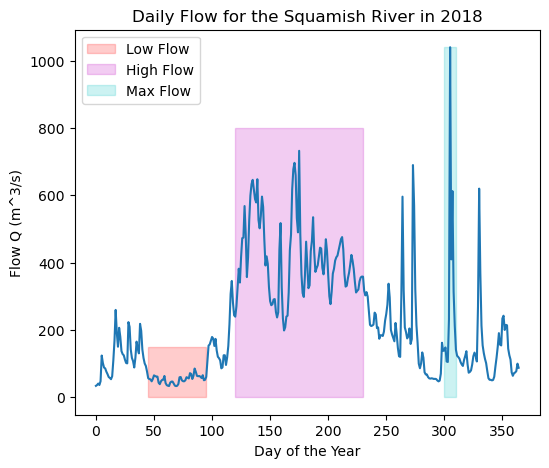

In [241]:
river_2018 = river[river['YYYY'] == 2018]

low_flow = patches.Rectangle((45, 0), 50, 150, linewidth=1, edgecolor='r', facecolor='r',alpha=0.2,label='Low Flow')
high_flow = patches.Rectangle((120, 0), 110, 800, linewidth=1, edgecolor='m', facecolor='m',alpha=0.2,label='High Flow')
max_flow = patches.Rectangle((300, 0), 10, river_2018['DISCHARGE'].max(), linewidth=1, edgecolor='c', facecolor='c',alpha=0.2,label='Max Flow')

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.plot(np.arange(len(river_2018)), river_2018['DISCHARGE'])
ax.set_xlabel('Day of the Year')
ax.set_ylabel('Flow Q (m^3/s)')
ax.set_title('Daily Flow for the Squamish River in 2018')

ax.add_patch(low_flow)
ax.add_patch(high_flow)
ax.add_patch(max_flow)

ax.legend()
# ax.vlines(50, 0, river_2018['DISCHARGE'].max(),'r')

In [242]:
physics = xr.open_dataset('../../../../civil541/HoweSound_dayavg_phys_20180101_20181231.nc')

In [49]:
# make a mask of land where land is true and water in NaN
bathymetry = xr.open_dataset('../../../../MEOPAR/grid/bathymetry_201702.nc')
land = np.array(np.isnan(bathymetry.Bathymetry).to_numpy(), dtype='float')
land[land == 0] = np.nan

# open the mesh mask and use it to mask the land
mesh = xr.open_dataset('../../../../MEOPAR/grid/mesh_mask201702.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

In [50]:
tmask.shape
tmask_howe = tmask[:, 500:540, 355:395]

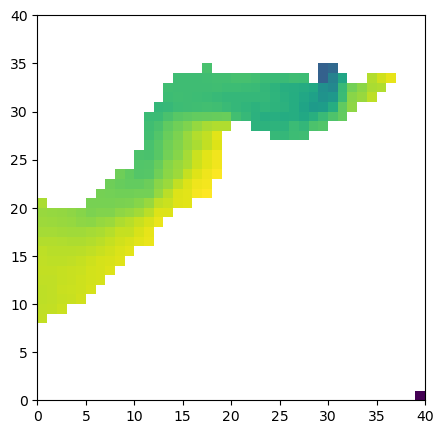

In [243]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
salinity = np.ma.masked_array(physics.vosaline[1, 0], mask=tmask_howe[0])
ax.pcolormesh(salinity)

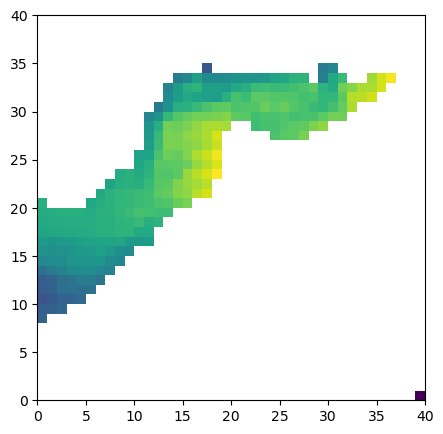

In [244]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
temperature = np.ma.masked_array(physics.votemper[1, 0], mask=tmask_howe[0])
ax.pcolormesh(temperature)

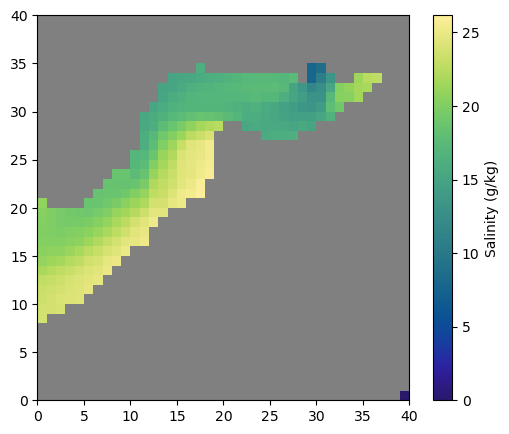

In [53]:
depth = 0
cmap = cm.haline
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
salinity = np.ma.masked_array(physics.vosaline[0, depth], mask=tmask_howe[0])
colours = ax.pcolormesh(salinity, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity (g/kg)')

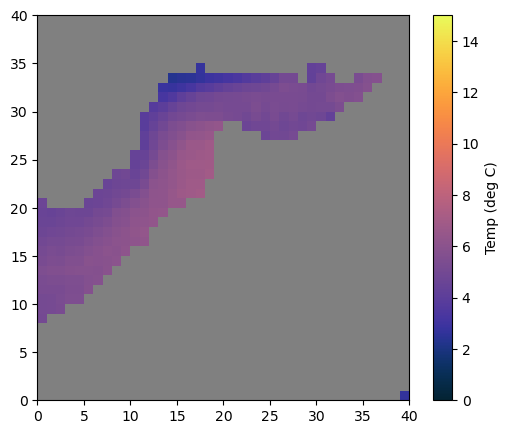

In [251]:
depth = 0
cmap = cm.thermal
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
temp = np.ma.masked_array(physics.votemper[0, depth], mask=tmask_howe[0])
colours = ax.pcolormesh(temp, cmap=cmap,vmin=0,vmax=15)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Temp (deg C)')

Text(0, 0.5, 'grid Y')

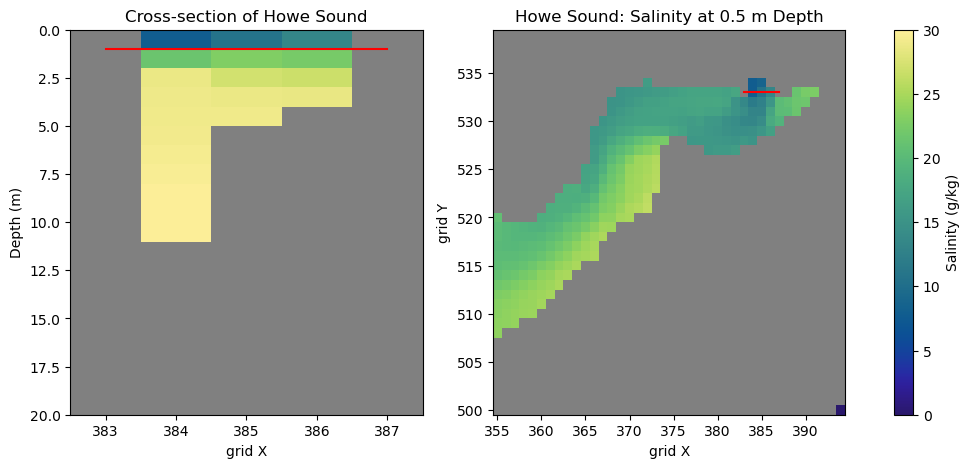

In [202]:
xmin = 28
xmax = 32
yval = 33
day = 0
max_depth = 20
depth_div = 1
depth_show = 0

cmap = cm.haline
cmap.set_bad('gray')

fig, ax = plt.subplots(1, 2, figsize=(12.5, 5))
salinity = np.ma.masked_array(physics.vosaline[day, :, yval, xmin:xmax+1], mask=tmask_howe[:, yval, xmin:xmax+1])
colours = ax[0].pcolormesh(physics.gridX[xmin:xmax+1], physics.depth, salinity, cmap=cmap,vmin=0,vmax=30)
ax[0].set_ylim(0, max_depth)
ax[0].invert_yaxis();
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity (g/kg)');
ax[0].set_title('Cross-section of Howe Sound')
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('grid X')
ax[0].plot(np.arange(xmin, xmax+1)+355, np.zeros(len(np.arange(xmin, xmax+1)))+depth, 'r')


salinity = np.ma.masked_array(physics.vosaline[day, depth_show], mask=tmask_howe[depth])
colours = ax[1].pcolormesh(physics.gridX[0:40+1], physics.gridY[0:40+1], salinity, cmap=cmap,vmin=0,vmax=30)
ax[1].plot(np.arange(xmin, xmax+1)+355, np.zeros(len(np.arange(xmin, xmax+1)))+yval+500,'r')
ax[1].set_title('Howe Sound: Salinity at {} m Depth'.format(str(np.round(physics.depth[depth_show].values,2))))
ax[1].set_xlabel('grid X')
ax[1].set_ylabel('grid Y')

Text(0, 0.5, 'grid Y')

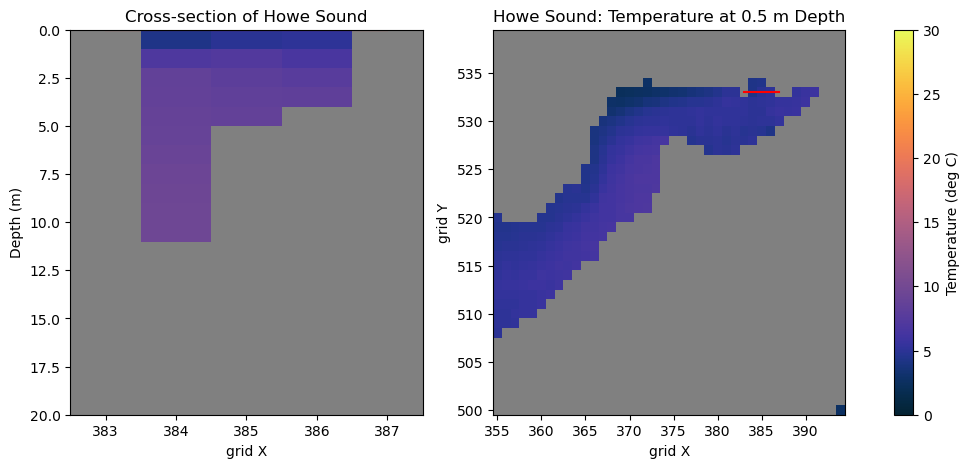

In [252]:
# xmin = 28
# xmax = 32
# yval = 33
# day = 0
# max_depth = 20
# depth_div = 1
# depth_show = 0

cmap = cm.thermal
cmap.set_bad('gray')

fig, ax = plt.subplots(1, 2, figsize=(12.5, 5))
temper = np.ma.masked_array(physics.votemper[day, :, yval, xmin:xmax+1], mask=tmask_howe[:, yval, xmin:xmax+1])
colours = ax[0].pcolormesh(physics.gridX[xmin:xmax+1], physics.depth, temper, cmap=cmap,vmin=0,vmax=30)
ax[0].set_ylim(0, max_depth)
ax[0].invert_yaxis();
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Temperature (deg C)');
ax[0].set_title('Cross-section of Howe Sound')
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('grid X')
ax[0].plot(np.arange(xmin, xmax+1)+355, np.zeros(len(np.arange(xmin, xmax+1)))+depth, 'r')


temper = np.ma.masked_array(physics.votemper[day, depth_show], mask=tmask_howe[depth])
colours = ax[1].pcolormesh(physics.gridX[0:40+1], physics.gridY[0:40+1], temper, cmap=cmap,vmin=0,vmax=30)
ax[1].plot(np.arange(xmin, xmax+1)+355, np.zeros(len(np.arange(xmin, xmax+1)))+yval+500,'r')
ax[1].set_title('Howe Sound: Temperature at {} m Depth'.format(str(np.round(physics.depth[depth_show].values,2))))
ax[1].set_xlabel('grid X')
ax[1].set_ylabel('grid Y')

In [254]:
top_slice_sal = physics.vosaline[day, :, yval, xmin:xmax+1][0:depth_div, :]
bot_slice_sal = physics.vosaline[day, :, yval, xmin:xmax+1][depth_div:40, :]

top_slice_temp = physics.votemper[day, :, yval, xmin:xmax+1][0:depth_div, :]
bot_slice_temp = physics.votemper[day, :, yval, xmin:xmax+1][depth_div:40, :]

In [ ]:
def avg_layer_phys(top_slice,bot_slice,depth_div):
    sel_water = tmask_howe[:, yval, xmin:xmax+1][0:depth_div, :].to_numpy().flatten() == 0
    top_layer = top_slice.to_numpy().flatten()[sel_water]
    S_top = np.mean(top_layer)

    sel_water = tmask_howe[:, yval, xmin:xmax+1][depth_div:40, :].to_numpy().flatten() == 0
    bot_layer = bot_slice.to_numpy().flatten()[sel_water]
    S_bot = np.mean(bot_layer)

    return list(S_top, S_bot)

In [198]:
sel_water = tmask_howe[:, yval, xmin:xmax+1][0:depth_div, :].to_numpy().flatten() == 0
top_layer = top_slice.to_numpy().flatten()[sel_water]
S_top = np.mean(top_layer)

sel_water = tmask_howe[:, yval, xmin:xmax+1][depth_div:40, :].to_numpy().flatten() == 0
bot_layer = bot_slice.to_numpy().flatten()[sel_water]
S_bot = np.mean(bot_layer)

In [ ]:
avg_layer_phys()

# Scratch

In [199]:
select_water = tmask_howe[:, yval, xmin:xmax+1].to_numpy().flatten() == 0
physics.vosaline[day, :, yval, xmin:xmax+1].to_numpy().flatten()[select_water]

array([ 7.7529917, 10.72099  , 13.299927 , 21.552515 , 22.913645 ,
       22.295883 , 28.606436 , 27.147068 , 26.726671 , 28.92246  ,
       28.617622 , 28.515333 , 29.048466 , 29.056562 , 29.113056 ,
       29.398447 , 29.601122 , 29.774656 , 29.828773 , 29.829485 ],
      dtype=float32)

Text(0.5, 1.0, 'Howe Sound: Salinity at 0.5000003 m Depth')

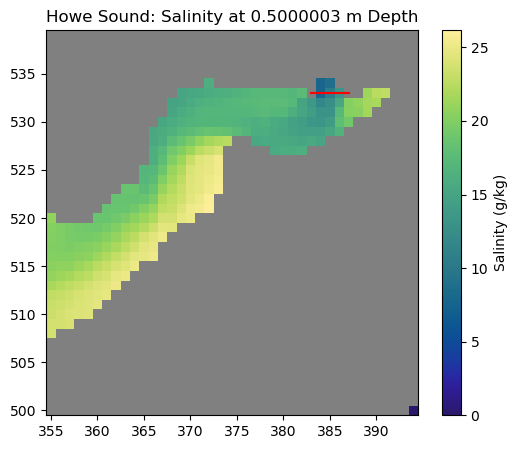

In [135]:
depth = 0

cmap = cm.haline
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
salinity = np.ma.masked_array(physics.vosaline[day, depth], mask=tmask_howe[depth])
colours = ax.pcolormesh(physics.gridX[0:40+1], physics.gridY[0:40+1], salinity, cmap=cmap,vmin=0)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity (g/kg)')
ax.plot(np.arange(xmin, xmax+1)+355, np.zeros(len(np.arange(xmin, xmax+1)))+yval+500,'r')
ax.set_title('Howe Sound: Salinity at {} m Depth'.format(str(physics.depth[depth].values)))

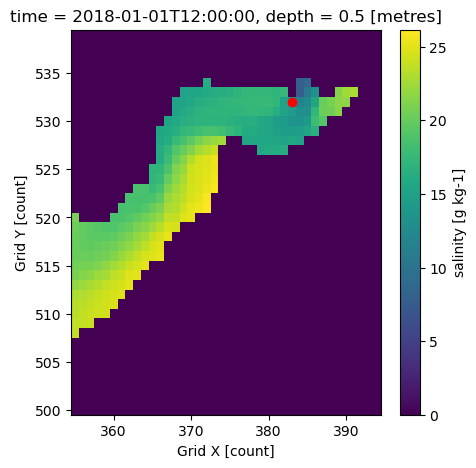

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
physics.vosaline[0, 0].plot(ax=ax);
ax.scatter(383, 532,color='r')

NameError: name 'plot_day' is not defined

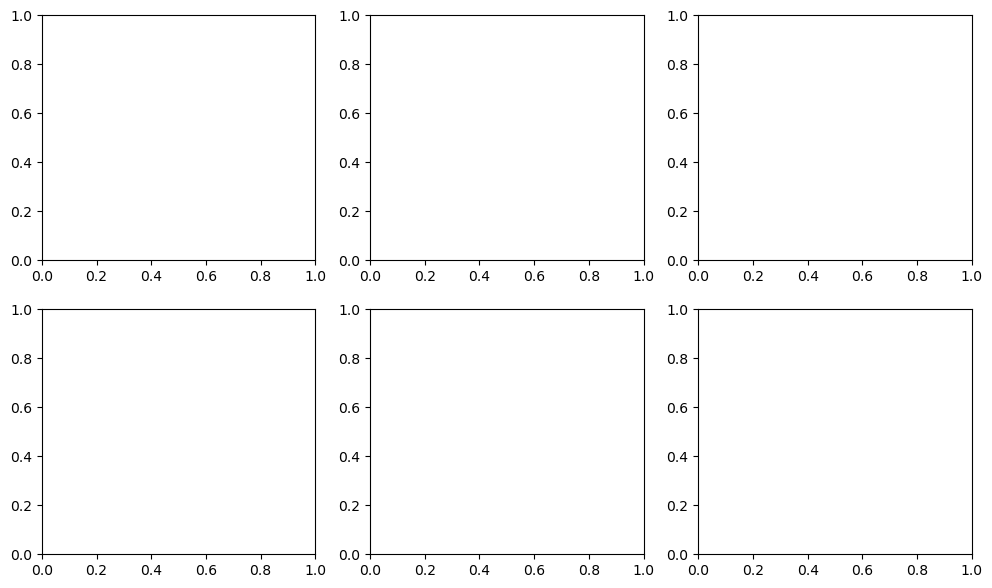

In [40]:
kd = 0 ## this will stay for surface
imin = 500
imax = 540
jmin = 355
jmax = 395
dm = physics

fig1, ax1 = plt.subplots(2, 3, figsize=(12, 7))

for i in np.arange(0,6):
    
    cmap = cm.haline
    cmap.set_bad('gray')

    
    day = plot_day[i]
    day_str = np.datetime_as_string(physics.time[day].values, unit='D')
    # salinity plot
    myarray = np.ma.array(dm.vosaline[day, kd, imin:imax, jmin:jmax])
    salinity = np.ma.masked_array(myarray, mask=tmask[0])
    colours = ax1[plot_ind[i][0], plot_ind[i][1]].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), salinity, cmap=cm.haline, shading='auto')
    ax1[plot_ind[i][0], plot_ind[i][1]].set_title(day_str)
    cb = fig1.colorbar(colours, ax=ax1[plot_ind[i][0], plot_ind[i][1]])
    cb.set_label('Salinity (g/kg)')
    viz_tools.set_aspect(ax1[plot_ind[i][0], plot_ind[i][1]]);
    
    
fig1.suptitle(f'Salinity at {kd+0.5} m (g/kg)')